# Ex4 - Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

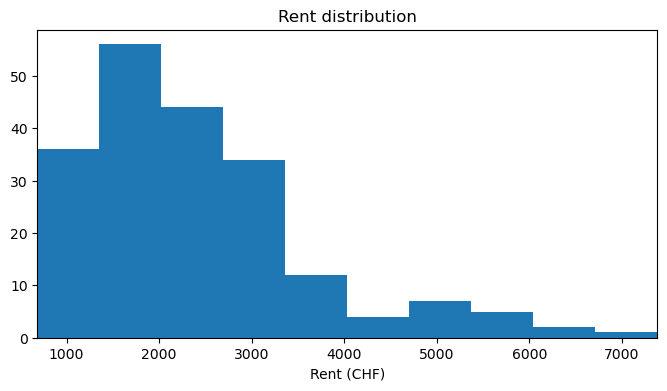

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

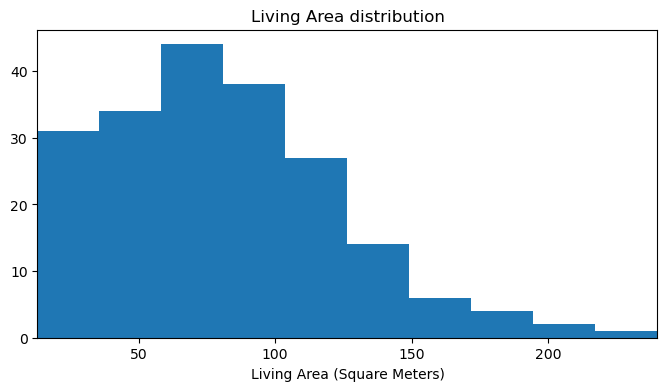

In [7]:
# Your code here
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living Area (Square Meters)")
plt.title("Living Area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


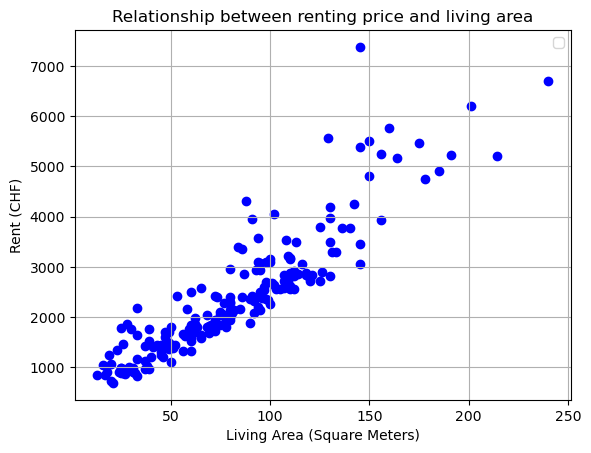

In [8]:
# Your code here
plt.scatter(living_area, rent_price, color='b', marker='o')
plt.xlabel('Living Area (Square Meters)')
plt.ylabel('Rent (CHF)')
plt.title('Relationship between renting price and living area')
plt.grid(True)
plt.legend()
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

In [9]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to no.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################
N = len(rent_price)
X = np.column_stack((np.ones(N), living_area))
y = rent_price

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

1. Transpose of X: XTXT
    - This step is implicitly performed by X.T, which transposes the design matrix X.

2. Matrix multiplication: XT⋅XXT⋅X
    - This multiplication is performed by X.T.dot(X). It computes the inner product of the transposed design matrix with itself.

3. Inverse of XT⋅XXT⋅X: (XT⋅X)−1(XT⋅X)−1
    - This step is performed by np.linalg.inv(X.T.dot(X)), which computes the inverse of the square matrix obtained in the previous step.

4. Matrix multiplication: (XT⋅X)−1⋅XT(XT⋅X)−1⋅XT
    - This multiplication is performed by .dot(X.T), which multiplies the inverse of XT⋅XXT⋅X with the transpose of X.

5. Matrix multiplication: (XT⋅X)−1⋅XT⋅y(XT⋅X)−1⋅XT⋅y
    - Finally, this multiplication is performed by .dot(y), which multiplies the result of the previous step with the target variable y.

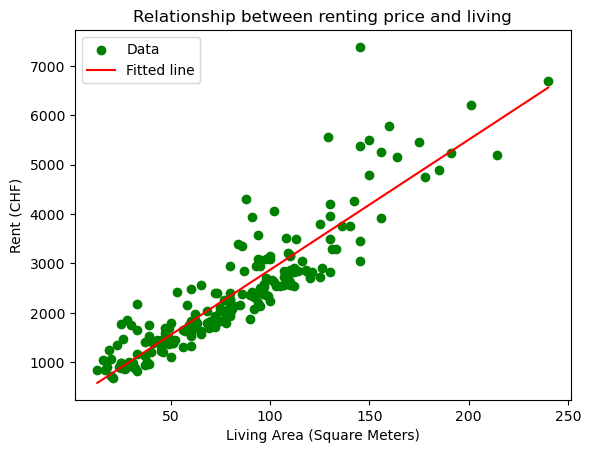

In [10]:
x_values = np.linspace(min(living_area), max(living_area), 100)
y_values = theta[0] + theta[1] * x_values

plt.scatter(living_area, rent_price, label='Data', color='green')
plt.plot(x_values, y_values, color='red', label='Fitted line')
plt.xlabel('Living Area (Square Meters)')
plt.ylabel('Rent (CHF)')
plt.title('Relationship between renting price and living')
plt.legend()
plt.show()
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [11]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################
def h_theta(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def mse_loss(y, y_hat):
    N = len(y)
    sqrd_errors = (y - y_hat) ** 2
    return (1 / (2 * N)) * np.sum(sqrd_errors)

y_hat = h_theta(living_area, theta[0], theta[1])
loss = mse_loss(rent_price, y_hat)

print("MSE Loss:", loss)
#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

MSE Loss: 138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

In [12]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################
import torch

living_area_tensor = torch.tensor(living_area, dtype=torch.float32)
rent_price_tensor = torch.tensor(rent_price, dtype=torch.float32)

X = torch.stack((torch.ones_like(living_area_tensor), living_area_tensor), dim=1)


1. Transpose of X: XTXT
    - X.T transposes the design matrix XX, flipping the rows and columns.

2. Matrix multiplication: XT⋅XXT⋅X
    - X.T.matmul(X) computes the inner product of the transposed design matrix with itself.

3. Inverse of XT⋅XXT⋅X: (XT⋅X)−1(XT⋅X)−1
    - torch.inverse(X.T.matmul(X)) computes the inverse of the square matrix obtained in the previous step.

4. Matrix multiplication: (XT⋅X)−1⋅XT(XT⋅X)−1⋅XT
    - .matmul(X.T) multiplies the inverse of XT⋅XXT⋅X with the transpose of XX.

5. Matrix multiplication: (XT⋅X)−1⋅XT⋅y(XT⋅X)−1⋅XT⋅y
    - .matmul(rent_price_tensor.unsqueeze(1)) multiplies the result of the previous step with the target variable yy.

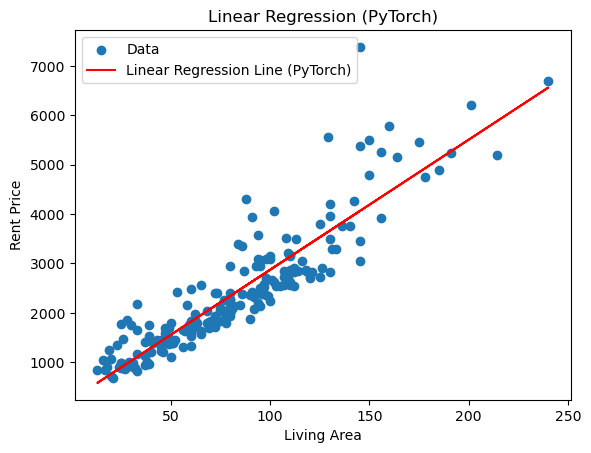

MSE Loss (PyTorch): tensor(2.7659e+08)


In [13]:
theta = torch.inverse(X.T.matmul(X)).matmul(X.T).matmul(rent_price_tensor.unsqueeze(1))

def mse_loss_torch(y, y_hat):
    N = len(y)
    squared_errors = (y_hat - y) ** 2
    return (1 / (2 * N)) * torch.sum(squared_errors)

plt.scatter(living_area, rent_price, label='Data')
plt.plot(living_area, X.matmul(theta).detach().numpy(), color='red', label='Linear Regression Line (PyTorch)')
plt.xlabel('Living Area')
plt.ylabel('Rent Price')
plt.title('Linear Regression (PyTorch)')
plt.legend()
plt.show()

# Compute the MSE loss
y_hat = X.matmul(theta)
loss = mse_loss_torch(rent_price_tensor, y_hat)
print("MSE Loss (PyTorch):", loss)


#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################